In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
df = pd.read_csv("imp_metrics_pf.csv")
df.shape

df.head(10)

In [3]:
df.head(10)

,id,seat#,transaction#,spend$,end_date
0,15,174,3,31.32,12/29/2015
1,89,27,5,682.49,8/8/2015
2,145,4,2,15.44,10/7/2015
3,228,9,4,242.65,12/31/2015
4,239,7,2,256.82,11/23/2015
5,427,8,1,366.10,10/25/2014
6,490,4,2,118.56,12/10/2014
7,552,163,82,275.94,9/7/2015
8,554,7,2,258.47,1/4/2014
9,600,16,5,183.26,9/8/2014


In [7]:
df1 = df[['seat#','transaction#','spend$']]
df1['seat#']= preprocessing.scale(df1['seat#'].astype('float64'))
df1['transaction#']= preprocessing.scale(df1['transaction#'].astype('float64'))
df1['spend$']= preprocessing.scale(df1['spend$'].astype('float64'))

c:\users\aayushi\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\aayushi\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\aayushi\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [5]:
df1.head(10)

,seat#,transaction#,spend$
0,41.614820,2.034481,-1.123313
1,5.371540,4.659149,3.409587
2,-0.299177,0.722147,-1.233856
3,0.933588,3.346815,0.347789
4,0.440482,0.722147,0.446429
5,0.687035,-0.590187,1.207145
6,-0.299177,0.722147,-0.516021
7,38.902738,105.708869,0.579526
8,0.440482,0.722147,0.457915
9,2.659458,4.659149,-0.065634


In [8]:
train = df1

In [9]:
train.shape[0]

285707

In [8]:
from scipy.spatial.distance import cdist
clusters = range(1,30)
mean_dist =[]
for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(train)
    clusassign = model.predict(train)
#     print (clusassign)
    mean_dist.append(sum(np.min(cdist(train,model.cluster_centers_,'euclidean'),axis =1))/ train.shape[0])

In [31]:
model.cluster_centers_

array([[-0.52250088, -0.59018675, -0.39396936],
       [ 3.48122239,  1.12222863,  3.79267076],
       [ 0.89418698, -0.08235189,  1.18764178],
       [ 1.91715449,  3.18624082,  1.0155358 ],
       [ 0.07964714,  0.8132451 , -0.27316042]])

In [9]:
mean_dist

[1.3053283932394677,
 1.0153899279476299,
 0.78221493036704082,
 0.69893558767365815,
 0.65096757253447901,
 0.55443192785217699,
 0.55716763377463974,
 0.52341079388859602,
 0.4842914772234671,
 0.44002671275602667,
 0.43260356611959738,
 0.41039341426210474,
 0.40562838525923522,
 0.38738378948985347,
 0.36977870638679156,
 0.37559537618850514,
 0.35613224747230166,
 0.35188279762478741,
 0.34019810260012845,
 0.32980335013624873,
 0.32672487968977953,
 0.31428913130469016,
 0.30909549601078057,
 0.29196709312582436,
 0.29348552403600292,
 0.28113100540348901,
 0.27276530229949181,
 0.27172671013999683,
 0.26569224699704835]

In [10]:
len(mean_dist)

29

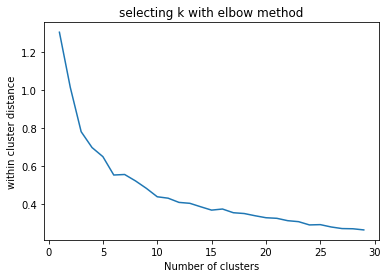

In [11]:
import matplotlib.pylab as plt
plt.plot(clusters,mean_dist)
plt.xlabel("Number of clusters")
plt.ylabel("within cluster distance")
plt.title("selecting k with elbow method")
plt.show()

In [16]:
model = KMeans(n_clusters= 5)
model.fit(train)
clusassign = model.predict(train)

In [22]:
list(model.labels_)

[1,
 1,
 4,
 3,
 4,
 2,
 4,
 3,
 4,
 3,
 4,
 0,
 0,
 4,
 3,
 0,
 1,
 3,
 1,
 3,
 4,
 0,
 3,
 3,
 4,
 3,
 1,
 0,
 0,
 1,
 1,
 0,
 4,
 0,
 1,
 4,
 0,
 4,
 3,
 3,
 4,
 1,
 0,
 0,
 4,
 2,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 4,
 1,
 0,
 4,
 4,
 4,
 3,
 4,
 4,
 1,
 0,
 4,
 0,
 4,
 2,
 0,
 4,
 0,
 0,
 0,
 4,
 4,
 4,
 0,
 0,
 4,
 0,
 4,
 3,
 0,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 4,
 3,
 4,
 3,
 3,
 4,
 0,
 4,
 4,
 4,
 3,
 4,
 0,
 4,
 3,
 0,
 4,
 4,
 3,
 4,
 0,
 0,
 3,
 4,
 4,
 0,
 4,
 4,
 0,
 0,
 4,
 3,
 4,
 2,
 4,
 4,
 0,
 4,
 0,
 0,
 4,
 4,
 0,
 4,
 4,
 3,
 0,
 3,
 4,
 3,
 0,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 0,
 4,
 4,
 4,
 3,
 0,
 4,
 4,
 4,
 0,
 3,
 4,
 4,
 3,
 4,
 0,
 4,
 2,
 0,
 4,
 4,
 0,
 3,
 0,
 0,
 4,
 0,
 0,
 4,
 4,
 0,
 3,
 4,
 0,
 0,
 3,
 0,
 1,
 3,
 0,
 4,
 4,
 4,
 2,
 0,
 4,
 4,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 0,
 3,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 0,
 0,
 0,
 4,
 3,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 4,
 0,
 3,
 4,
 4,
 3,
 3,
 0,
 2,
 3,
 4,
 0,
 0,
 4,
 3,
 4,


In [24]:
df1['cluster'] = list(model.labels_)

c:\users\aayushi\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df['cluster'] = list(model.labels_)

In [27]:
df.head()

,id,seat#,transaction#,spend$,end_date,cluster
0,15,174,3,31.32,12/29/2015,1
1,89,27,5,682.49,8/8/2015,1
2,145,4,2,15.44,10/7/2015,4
3,228,9,4,242.65,12/31/2015,3
4,239,7,2,256.82,11/23/2015,4


In [30]:
df.cluster.value_counts()

0    156886
4     72461
2     40695
3      9411
1      6254
Name: cluster, dtype: int64

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
pca2 = PCA(2)
plot_columns = pca2.fit_transform(train)

In [19]:
plot_columns

array([[ 27.62364627,  -1.28627726],
       [  7.76553412,   1.26867347],
       [ -0.54895645,   1.3332262 ],
       ..., 
       [ -0.30405145,   0.08883289],
       [ -1.19169146,   0.27704974],
       [ -0.12595267,   1.33292815]])

In [28]:
plot_columns[:,0]

array([ 27.62364627,   7.76553412,  -0.54895645, ...,  -0.30405145,
        -1.19169146,  -0.12595267])

In [29]:
plot_columns[:,0].shape

(285707,)

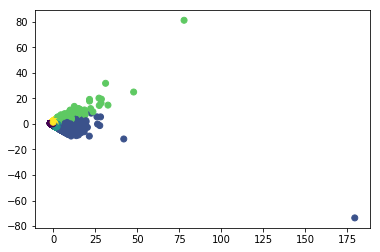

In [20]:
plt.scatter(x = plot_columns[:,0],y= plot_columns[:,1],c = model.labels_,)
plt.show()